# Aquecimento 1: análise de dados IRGA com SciPy

Como aquecimento e demonstração das possibilidades do ambiente, vamos analisar dados provenientes de um disposito IRGB (*infra-red gas analyser*). Neste exemplo, **40 plantas** foram analisadas em **12 dias** diferentes. Em cada dia, para cada planta, foram obtidas **4 medições** para as seguintes variáveis:

* *A* - taxa de assimilação de CO$_2$,
* *gs* - condutância estomática,
* *C$_i$* - concentração intercelular de CO$_2$,
* *E* - taxa de transpiração.

Uma maneira natural de representar esses dados é utilizar uma **tabela** de valores numéricos. Computacionalmente, vamos utilizar uma **estrutura** de dados chamada de *matriz* ou *array*. 

Python é uma linguagem de programação. Sua funcionalidade básica é expandida com o uso de **módulos**. Há um conjunto de módulos, chamado de **SciPy Stack**, que adiciona ao ambiente uma série de funcionalidades comumente utilizadas em **computação científica**. Um desses módulos é chamado de **NumPy** e é utilizado para criação e manipulação de arrays.

Resumindo, utilizaremos **NumPy para manipular tabelas numéricas com nossos dados de IRGA**. Para importar o módulo, basta utilizar o comando:

In [1]:
import numpy

Nossos dados estão em uma tabela CSV (*comma-separated values*), uma forma simples de representar tabelas em arquivos. Abaixo estão as 10 primeiras linhas do arquivo:

In [3]:
!head data/pheno-irga-day11.csv

A;gs;Ci;E
33.6491401839225;0.250859113102811;119.207565353659;4.74819300588148
39.9505774987877;0.336445629994432;133.484928623388;5.57841986232047
30.2122755502531;0.214374820865742;113.765752474792;4.19312084675806
32.0832740326768;0.210631425776747;92.9027168628308;4.16362909039323
30.2508652434561;0.216691776198334;116.042716529691;4.23908567763283
34.5797354435639;0.236856658495617;98.9281187985163;4.47347264034459
31.6684177725924;0.245270961272869;130.413464836187;4.57783889528323
34.4413842760489;0.23857872473937;101.79064963821;4.46671252627147
34.7883906691637;0.311443380975331;152.950723724841;5.27144355864789


Queremos esses dados representados devidamente como um *array NumPy* que possamos manipular. Podemos utilizar o módulo NumPy para realizar a leitura dos dados:

In [4]:
numpy.loadtxt(fname='data/pheno-irga-day11.csv', delimiter=';', skiprows=1)

array([[  3.36491402e+01,   2.50859113e-01,   1.19207565e+02,
          4.74819301e+00],
       [  3.99505775e+01,   3.36445630e-01,   1.33484929e+02,
          5.57841986e+00],
       [  3.02122756e+01,   2.14374821e-01,   1.13765752e+02,
          4.19312085e+00],
       [  3.20832740e+01,   2.10631426e-01,   9.29027169e+01,
          4.16362909e+00],
       [  3.02508652e+01,   2.16691776e-01,   1.16042717e+02,
          4.23908568e+00],
       [  3.45797354e+01,   2.36856658e-01,   9.89281188e+01,
          4.47347264e+00],
       [  3.16684178e+01,   2.45270961e-01,   1.30413465e+02,
          4.57783890e+00],
       [  3.44413843e+01,   2.38578725e-01,   1.01790650e+02,
          4.46671253e+00],
       [  3.47883907e+01,   3.11443381e-01,   1.52950724e+02,
          5.27144356e+00],
       [  3.85425001e+01,   3.93409107e-01,   1.68657172e+02,
          5.97622932e+00],
       [  3.76307210e+01,   3.15638579e-01,   1.36653664e+02,
          5.27206093e+00],
       [  3.03932359e

Acima, nós utilizamos a **função** `loadtxt` no módulo NumPy para fazer a leitura do CSV e criar um *array* com seu conteúdo. A função recebeu 3 **parâmetros**: o caminho para o arquivo, o caracter delimitador utilizado para separar as colunas no arquivo CSV e o número de colunas de cabeçalho que deveriam ser ignoradas durante a leitura.

O comando acima não armazenou o *array* em uma **variável** para que possamos referenciá-lo e manipulá-lo posteriormente. Suponha que desejamos referenciar esses dados pelo nome `irga_day1`. Isto pode ser feito facilmente com:

In [5]:
irga_day1 = numpy.loadtxt(fname='data/pheno-irga-day11.csv', delimiter=';', skiprows=1)

In [6]:
print(irga_day1)

[[  3.36491402e+01   2.50859113e-01   1.19207565e+02   4.74819301e+00]
 [  3.99505775e+01   3.36445630e-01   1.33484929e+02   5.57841986e+00]
 [  3.02122756e+01   2.14374821e-01   1.13765752e+02   4.19312085e+00]
 [  3.20832740e+01   2.10631426e-01   9.29027169e+01   4.16362909e+00]
 [  3.02508652e+01   2.16691776e-01   1.16042717e+02   4.23908568e+00]
 [  3.45797354e+01   2.36856658e-01   9.89281188e+01   4.47347264e+00]
 [  3.16684178e+01   2.45270961e-01   1.30413465e+02   4.57783890e+00]
 [  3.44413843e+01   2.38578725e-01   1.01790650e+02   4.46671253e+00]
 [  3.47883907e+01   3.11443381e-01   1.52950724e+02   5.27144356e+00]
 [  3.85425001e+01   3.93409107e-01   1.68657172e+02   5.97622932e+00]
 [  3.76307210e+01   3.15638579e-01   1.36653664e+02   5.27206093e+00]
 [  3.03932359e+01   2.13614839e-01   1.11810534e+02   3.95755408e+00]
 [  3.72603824e+01   3.19938014e-01   1.41897930e+02   5.14012496e+00]
 [  4.10243184e+01   3.94744147e-01   1.55843524e+02   5.57800042e+00]
 [  3.

## O que temos na memória?

Podemos ver que variáveis temos em memória e quanto espaço estão consumindo com o comando `%whos`:

In [7]:
%whos

Variable    Type       Data/Info
--------------------------------
irga_day1   ndarray    40x4: 160 elems, type `float64`, 1280 bytes
numpy       module     <module 'numpy' from '/us<...>ages/numpy/__init__.pyc'>


## Informações sobre o array

Um *array NumPy* não é meramente uma tabela com valores. Ele é um **objeto**, uma estrutura de dados especial que, além dos dados, armazena alguns **atributos** e implementa diversas **operações** úteis. 

### Exemplos de atributos

In [8]:
irga_day1.shape

(40, 4)

Como esperado, temos um *array* $40 \times 4$, correspondendo a 40 plantas e 4 medidas por planta.

In [9]:
irga_day1.dtype

dtype('float64')

As medidas estão sendo armazenadas como *números reais*, representados no computador pelo tipo *ponto flutuante* com 64 bits. 

### Exemplos de operações

In [10]:
irga_day1.mean(axis=0)

array([  18.74234704,    0.15200917,  106.54359334,    2.64263339])

Uma das diversas operações implementadas pelo objeto *array* é o **cômputo da média**. Acima, podemos ver os valores médios observados para *A*, *gs*, *E* e $C_i$ respectivamente.

## Acesso a elementos no *array*

A taxa de transpiração $E$ está na 3ª coluna. Considere que desejamos acessar a taxa para a 5ª planta. Queremos assim acesso à 3ª coluna da 5ª linha.

In [11]:
irga_day1[4,2]

116.04271652969101

Os números acima entre colchetes, `[i,j]`, são **índices**. O primeiro indexa a *linha*, o segundo a *coluna*. Assim, `irga_day1[4,2]` referencia a linha 4, coluna 2.

 

O que pode causar estranheza é o fato de desejarmos incialmente a 3ª coluna na 5ª linha. Linguagens de programação como C++, Java e Python **iniciam a indexação por 0 (zero)**. A primeira linha é a linha 0, a segunda a linha 1 e assim por diante. Logo, a 5ª linha corresponde à linha 4:

* 1ª linha - linha 0,
* 2ª linha - linha 1,
* 3ª linha - linha 2,
* 4ª linha - linha 3,
* **5ª linha - linha 4**.

O mesmo vale para as colunas, de forma que a coluna 2 corresponde à 3ª linha. Assim, nosso *array* $40 \times 4$ é referenciados por linhas de 0 a 39 e colunas de 0 a 3. 

Esta é sem dúvida uma das maiores dificuldades iniciais enfrentada por pesquisadores sem experiência prévia com computação, ou cuja experiência se baseia nas linguagens Fortran ou Matlab, que indexam  a partir do índice 1, como é mais intuitivo à maioria das pessoas. 

##  "Fatiando arrays": slicing

In [12]:
irga_day1[:,2]

array([ 119.20756535,  133.48492862,  113.76575247,   92.90271686,
        116.04271653,   98.9281188 ,  130.41346484,  101.79064964,
        152.95072372,  168.65717224,  136.65366407,  111.81053426,
        141.8979299 ,  155.84352413,  130.91559905,  137.76584376,
        132.19156374,  169.27632361,  152.80702457,  165.20691437,
        179.91763776,  286.8525027 ,   66.07636327,   28.27296464,
        110.1130894 ,  155.28051539,   94.21361107,  103.95746654,
        239.66225297, -257.18658601,   59.74312148,  -89.88444805,
        139.30040348,  -71.22960891,   69.53886701,  102.08902521,
        271.46287334,  172.78816885,  103.26129278, -164.99850997])

Acima, temos todos os valores de $E$ para as 40 plantas. Podemos facilmente computar a média:

In [13]:
irga_day1[:,2].mean()

106.54359333724111

In [14]:
E = irga_day1[:,2]
maxval, minval, stdval, meanval = numpy.max(E), numpy.min(E), numpy.std(E), numpy.mean(E)

print('Taxa de transpiracao:')
print('Maxima:', maxval)
print('Minima:', minval)
print('Media:', meanval)
print('Desvio padrao:', stdval)

Taxa de transpiracao:
('Maxima:', 286.85250270267397)
('Minima:', -257.18658601114799)
('Media:', 106.54359333724111)
('Desvio padrao:', 100.32865125622591)


## Visualização de dados

Vamos importar alguns módulos necessários:

In [15]:
from matplotlib import pyplot 

%matplotlib inline
import seaborn

Text(0,0.5,u'$E$ (taxa de transpira\xe7\xe3o)')

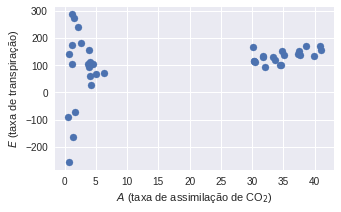

In [16]:
pyplot.figure(figsize=(5,3))
pyplot.scatter(irga_day1[:,0], irga_day1[:,2])
pyplot.xlabel(u'$A$ (taxa de assimilação de CO$_2$)')
pyplot.ylabel(u'$E$ (taxa de transpiração)')

Text(0,0.5,u'$gs$ (condut\xe2ncia estom\xe1tica)')

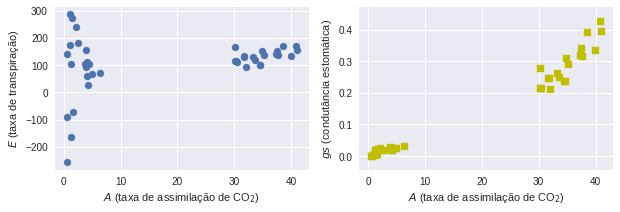

In [17]:
pyplot.figure(figsize=(10,3))
pyplot.subplot(1,2,1)
pyplot.scatter(irga_day1[:,0], irga_day1[:,2])
pyplot.xlabel(u'$A$ (taxa de assimilação de CO$_2$)')
pyplot.ylabel(u'$E$ (taxa de transpiração)')

pyplot.subplot(1,2,2)
pyplot.scatter(irga_day1[:,0], irga_day1[:,1], marker='s', color='y')
pyplot.xlabel(u'$A$ (taxa de assimilação de CO$_2$)')
pyplot.ylabel(u'$gs$ (condutância estomática)')

## *Quais plantas tem taxa de assimiliação inferior a 10?*

In [18]:
numpy.argwhere(irga_day1[:,0] < 10)

array([[20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39]])

Plantas submetidas a estresse hídrico.

## Armazenamento da série de dados

Abaixo, temos uma **lista** de dias em que as medições foram realizadas:

In [19]:
days = [1, 3, 4, 5, 6, 7, 9, 10, 11, 16, 17]

A partir dela, geramos uma **seguda lista**, com o nome dos arquivos que armazenam as leituras de cada dia:

In [20]:
csv_files = ['data/pheno-irga-day%.2d.csv' % d for d in days]
csv_files

['data/pheno-irga-day01.csv',
 'data/pheno-irga-day03.csv',
 'data/pheno-irga-day04.csv',
 'data/pheno-irga-day05.csv',
 'data/pheno-irga-day06.csv',
 'data/pheno-irga-day07.csv',
 'data/pheno-irga-day09.csv',
 'data/pheno-irga-day10.csv',
 'data/pheno-irga-day11.csv',
 'data/pheno-irga-day16.csv',
 'data/pheno-irga-day17.csv']

Finalmente, uma **terceira lista** é obtida, contendo os arrays lidos de cada arquivo. Essa lista é então **empilhada**, formando um array $40 \times 4 \times 11$ (quarenta plantas, 4 medidas, 11 dias):

In [21]:
irga_data_day = [numpy.loadtxt(filename, delimiter=';', skiprows=1) for filename in csv_files]
irga_data = numpy.dstack(irga_data_day)

irga_data.shape

(40, 4, 11)

In [22]:
# Planta 0 (1ª planta), E nos 11 dias
irga_data[0,3,:]

array([ 5.05267575,  4.59028883,  4.59028883,  5.03886152,  3.97486472,
        5.3524078 ,  5.11403755,  5.37893   ,  4.74819301,  4.90270044,
        5.53625233])

Text(0,0.5,u'$E$ (taxa de transpira\xe7\xe3o)')

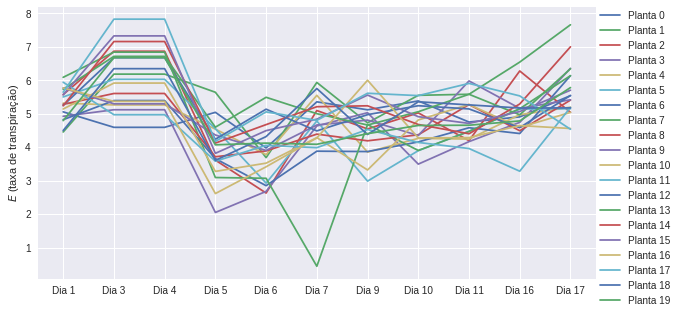

In [23]:
pyplot.figure(figsize=(10,5))
for p in range(20):
    pyplot.plot(irga_data[p,3,:], label='Planta %d' % p)    
    ticks = pyplot.xticks(range(11), ['Dia %d' % d for d in days])
pyplot.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pyplot.ylabel(u'$E$ (taxa de transpiração)')

Text(0,0.5,u'$E$ (taxa de transpira\xe7\xe3o)')

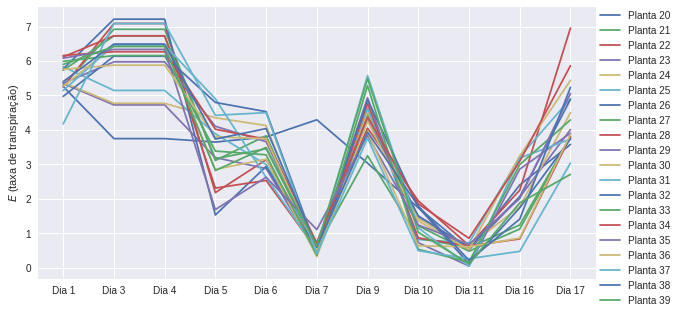

In [24]:
pyplot.figure(figsize=(10,5))
for p in range(20, 40):
    pyplot.plot(irga_data[p,3,:], label='Planta %d' % p)
    ticks = pyplot.xticks(range(11), ['Dia %d' % d for d in days])    
pyplot.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pyplot.ylabel(u'$E$ (taxa de transpiração)')

# Aquecimento 2: imagens térmicas com SciPy

Vamos carregar as leituras de uma **câmera térmica**, armazenados em um arquivo texto:

In [25]:
!head -2 data/GR009.txt

56.447 56.704 57.389 56.439 55.072 55.555 57.285 57.313 56.08 55.551 55.818 57.085 57.561 58.851 59.844 60.044 59.533 58.863 59.309 59.388 59.411 59.325 59.742 58.883 58.487 57.644 56.282 55.125 54.889 54.559 54.885 53.252 53.999 57.053 58.086 55.583 55.352 57.373 59.474 60.615 60.126 59.388 58.213 57.013 56.391 56.539 57.117 56.165 54.392 54.2 53.568 54.183 55.032 55.32 55.316 54.934 54.95 54.563 54.367 54.233 54.02 53.979 54.322 56.736 58.602 59.368 58.824 58.003 58.839 59.604 59.474 59.238 58.444 58.812 59.045 58.78 59.159 59.116 58.321 55.612 54.445 55.769 55.632 56.044 55.866 56.23 53.987 55.369 56.58 57.684 57.676 57.856 58.376 59.596 59.824 59.962 58.95 58.479 57.975 58.752 58.578 58.527 58.202 58.237 59.301 59.033 58.61 58.126 58.388 58.134 58.602 58.535 57.045 55.988 54.645 55.105 55.535 54.665 54.926 56.495 57.533 56.157 57.053 59.171 59.553 59.561 59.033 58.946 58.99 57.513 57.517 57.975 57.277 57.405 57.624 57.553 58.202 59.459 59.494 59.663 60.005 60.005 59.301 59.069 59.0

In [26]:
T = numpy.loadtxt('data/GR009.txt')
T.shape

(240, 320)

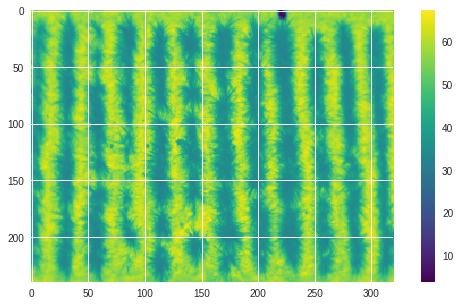

In [27]:
pyplot.figure(figsize=(10,5))
pyplot.imshow(T, cmap=pyplot.cm.viridis)
pyplot.colorbar()

A câmera térmica opera captando **infra-vermelho** do espectro. No dispositivo, há um segundo sensor, que capta o **espectro visível**. Vamos utilizar o módulo `skimage.io` para ler a imagem, que está armazenada em um arquivo JPEG:

In [28]:
from skimage import io

I = io.imread('data/DC_0010.jpg')
I.shape

(710, 947, 3)

A imagem foi lifa com uma array com 710 linhas, 947 colunas e **3 canais**, correspondendo a *vemelho*, *verde* e *azul*.

Text(0.5,1,u'Azul')

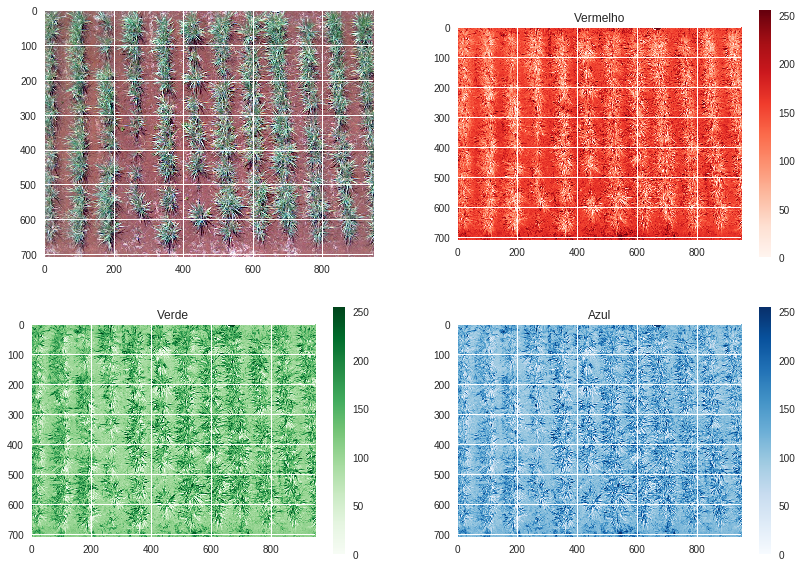

In [30]:
fig = pyplot.figure(figsize=(14,10))
pyplot.subplot(2,2,1)
pyplot.imshow(I)

pyplot.subplot(2,2,2)
pyplot.imshow(I[:,:,0], cmap=pyplot.cm.Reds) # Canal vermelho
pyplot.colorbar()
pyplot.title('Vermelho')

pyplot.subplot(2,2,3)
pyplot.imshow(I[:,:,1], cmap=pyplot.cm.Greens) # Canal verde
pyplot.colorbar()
pyplot.title('Verde')

pyplot.subplot(2,2,4)
pyplot.imshow(I[:,:,2], cmap=pyplot.cm.Blues) # Canal azul
pyplot.colorbar()
pyplot.title('Azul')

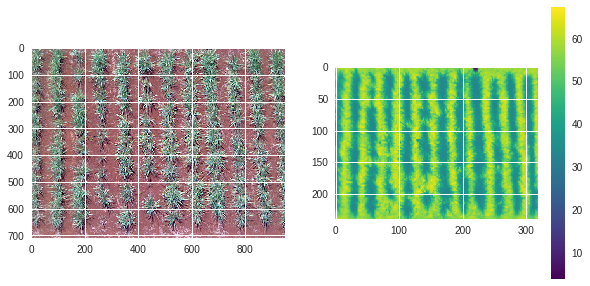

In [31]:
pyplot.figure(figsize=(10,5))
pyplot.subplot(1,2,1)
pyplot.imshow(I)

pyplot.subplot(1,2,2)
pyplot.imshow(T, cmap=pyplot.cm.viridis)
pyplot.colorbar()

# A seguir:

* Introdução: computação científica interativa no ambiente SciPy
* Linguagem Python de programação
* IPython e computação científica em *notebooks*
* Visualização científica com gráficos Matplotlib
* Processamento de imagens de fenotipagem com NumPy e scikit-image